## **SPOTIFY**

**PROJECT DESCRIPTION**

The music industry has undergone a significant transformation in recent years, driven primarily by the emergence of digital streaming platforms like **Spotify**. These platforms have not only changed the way people consume music but have also generated vast amounts of data related to user preferences, listening habits, and song features. 
Leveraging this data for insights has become increasingly important for various stakeholders in the music industry, including artists, record labels, and music recommendation services.

---------------------------------------------------------

**MAIN OBJECTIVE**

In this project, our primary objective is to explore and analyze a large dataset of songs collected from the Spotify Web API, encompassing the period between 1921 and 2020. By employing machine learning techniques, we aim to develop a **predictive model** capable of identifying songs that are likely to become popular and understanding the key factors that contribute to their success. Such a model can potentially be used by artists, producers, and record labels to better tailor their work to the tastes and preferences of their target audience, ultimately increasing the chances of a song's success in the highly competitive music market.

The importance of this project lies in its potential to provide a deeper understanding of the factors that contribute to a song or artist's success, as well as to offer valuable insights into the ever-changing landscape of the music industry. Moreover, the findings of this project can serve as a basis for further research and development in the realm of music analytics, paving the way for more advanced and personalized music experiences for users across the globe.

In [1]:
#libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## EDA - ALBUMS

**Data Dictionary**

The following data dictionary provides an overview of the variables found in the Spotify album dataset. This dataset contains information about various albums, their associated artists, and additional details that can help us analyze trends and patterns in the music industry.

* **album_type** : The type of the album (e.g., 'single', 'album', 'compilation').
* **artist_id** : A unique identifier for the artist associated with the album.
* **available_markets** : A list of market codes (country codes) where the album is available for streaming or purchase.
* **eternal_urls** : A link to the Spotify Web API endpoint containing full details about the album.
* **href** : A link to the Spotify Web API endpoint containing full details about the album.
* **id** : A unique identifier for the album.
* **images** : A list of dictionaries containing URLs to album cover images, along with image dimensions (width and height).
* **name** : The name of the album.
* **release_date** : The release date of the album, usually in the format 'YYYY-MM-DD'.
* **release_date_precision** : The precision level of the release date (e.g., 'year', 'month', 'day'), indicating the accuracy of the provided release date.
* **total_tracks** : The total number of tracks in the album.
* **track_id** : A unique identifier for the track associated with the album.
* **track_name_prev** : The name of the previous track in the album or the previous version of the track (depending on the context in your dataset).
* **uri** : A link to the Spotify Web API endpoint containing full details about the album.
* **type** : The object type, which should be 'album' for this dataset, indicating that the data entry is related to an album.

In [3]:
albums = pd.read_csv('SpotGenTrack/Data Sources/spotify_albums.csv', index_col = 0)

In [4]:
albums.head()

,album_type,artist_id,available_markets,external_urls,href,id,images,name,release_date,release_date_precision,total_tracks,track_id,track_name_prev,uri,type
0,single,3DiDSECUqqY1AuBP8qtaIa,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",{'spotify': 'https://open.spotify.com/album/1g...,https://api.spotify.com/v1/albums/1gAM7M4rBwEb...,1gAM7M4rBwEbSPeAQR2nx1,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",If I Ain't Got You EP,2019-02-08,day,6,2iejTMy9XZ8Gaae0aQ2yl0,track_32,spotify:album:1gAM7M4rBwEbSPeAQR2nx1,album
1,album,6s1pCNXcbdtQJlsnM1hRIA,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",{'spotify': 'https://open.spotify.com/album/4K...,https://api.spotify.com/v1/albums/4KfJZV7WfolY...,4KfJZV7WfolYlxBzOTo66s,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Shostakovich Symphony No.5 - Four Romances on ...,2019-03-01,day,8,1WQfghEjszJJ4H8MAWrQ2C,track_11,spotify:album:4KfJZV7WfolYlxBzOTo66s,album
2,single,5YjfNaHq05WrwldRe1QSBc,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",{'spotify': 'https://open.spotify.com/album/7n...,https://api.spotify.com/v1/albums/7nLYY7uAVUb5...,7nLYY7uAVUb57kpd7tZxnS,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Take My Bass,2019-03-14,day,1,3jJKj4QTK3v18ZSwpk7AcV,track_15,spotify:album:7nLYY7uAVUb57kpd7tZxnS,album
3,single,2G9Vc16JCpnZmK4uGH46Fa,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",{'spotify': 'https://open.spotify.com/album/6p...,https://api.spotify.com/v1/albums/6p20Rt4x2Qn5...,6p20Rt4x2Qn5mUMRi1s6pj,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Hypnotizing (Are U),2016-11-16,day,1,1xGtDafUZbHyYC3Xarcbrj,track_46,spotify:album:6p20Rt4x2Qn5mUMRi1s6pj,album
4,single,2dwM9OcE4c3Ph1UBINSodx,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",{'spotify': 'https://open.spotify.com/album/1X...,https://api.spotify.com/v1/albums/1XeoOqC1q7U2...,1XeoOqC1q7U2iyLEQJ64cu,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Sunshine,2018-07-20,day,1,0gWtsXvXOzAT6FtM3ur8in,track_10,spotify:album:1XeoOqC1q7U2iyLEQJ64cu,album


In [5]:
albums.dtypes

album_type                object
artist_id                 object
available_markets         object
external_urls             object
href                      object
id                        object
images                    object
name                      object
release_date              object
release_date_precision    object
total_tracks               int64
track_id                  object
track_name_prev           object
uri                       object
type                      object
dtype: object

In [6]:
albums.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75511 entries, 0 to 75510
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   album_type              75511 non-null  object
 1   artist_id               75511 non-null  object
 2   available_markets       75511 non-null  object
 3   external_urls           75511 non-null  object
 4   href                    75511 non-null  object
 5   id                      75511 non-null  object
 6   images                  75511 non-null  object
 7   name                    75511 non-null  object
 8   release_date            75511 non-null  object
 9   release_date_precision  75511 non-null  object
 10  total_tracks            75511 non-null  int64 
 11  track_id                75511 non-null  object
 12  track_name_prev         75511 non-null  object
 13  uri                     75511 non-null  object
 14  type                    75511 non-null  object
dtypes:

In [7]:
albums.describe()

,total_tracks
count,75511.000000
mean,8.235807
std,11.669811
min,1.000000
25%,1.000000
50%,5.000000
75%,12.000000
max,977.000000


In [8]:
#check for missing values
albums.isnull().sum()

album_type                0
artist_id                 0
available_markets         0
external_urls             0
href                      0
id                        0
images                    0
name                      0
release_date              0
release_date_precision    0
total_tracks              0
track_id                  0
track_name_prev           0
uri                       0
type                      0
dtype: int64

In [9]:
#check for duplicated rows
albums.duplicated().unique()

array([False])

In [10]:
#datetime
albums['release_date']= pd.to_datetime(albums['release_date'])

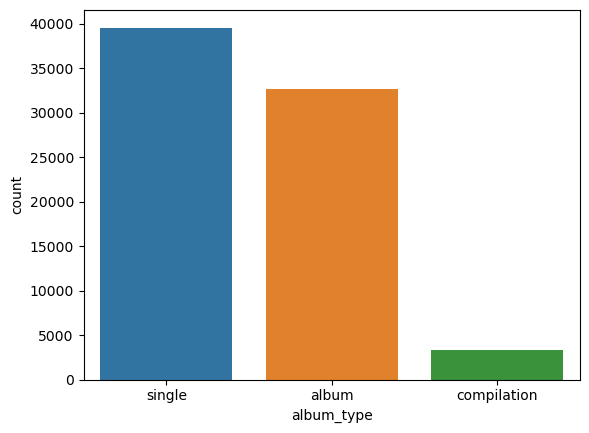

In [11]:
#album type distribution
sns.countplot(x='album_type', data=albums)
plt.show()

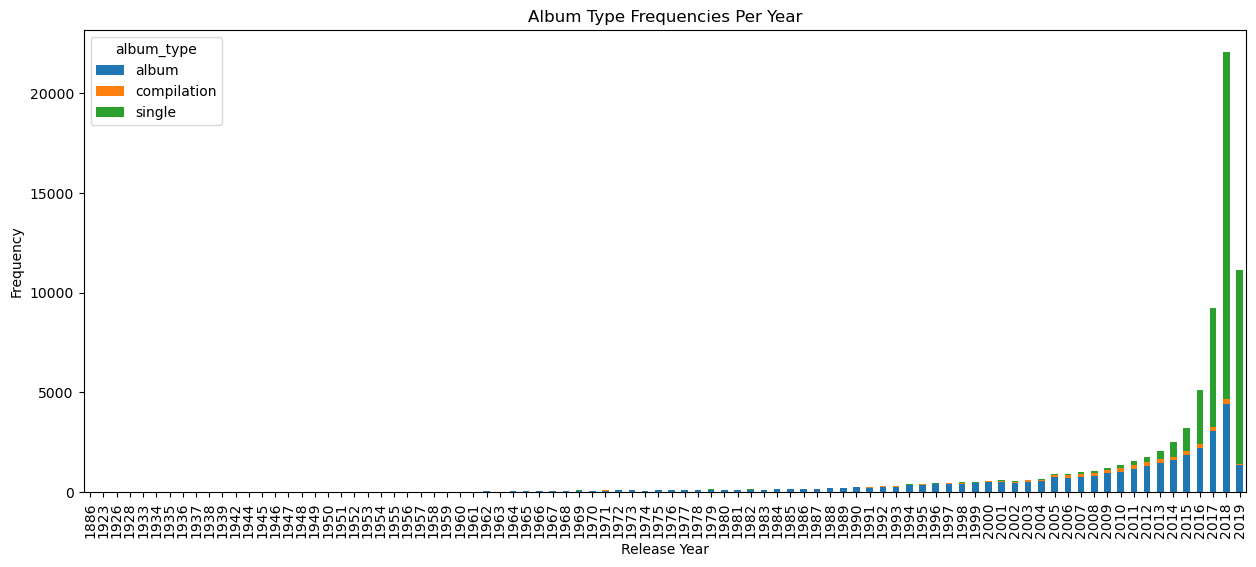

In [12]:
#album type distribution per year

# Convert 'release_date' to datetime and extract the year
albums['release_year'] = pd.to_datetime(albums['release_date']).dt.year

# Calculate album type frequencies per year
yearly_album_type_counts = albums.groupby(['release_year', 'album_type']).size().reset_index(name='count')

# Pivot the yearly_album_type_counts dataframe to create a table suitable for plotting
yearly_album_type_pivot = yearly_album_type_counts.pivot_table(index='release_year', columns='album_type', values='count', fill_value=0)

# Plot the stacked bar plot using pandas plot function
yearly_album_type_pivot.plot(kind='bar', stacked=True, figsize=(15, 6))
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.title('Album Type Frequencies Per Year')
plt.show()

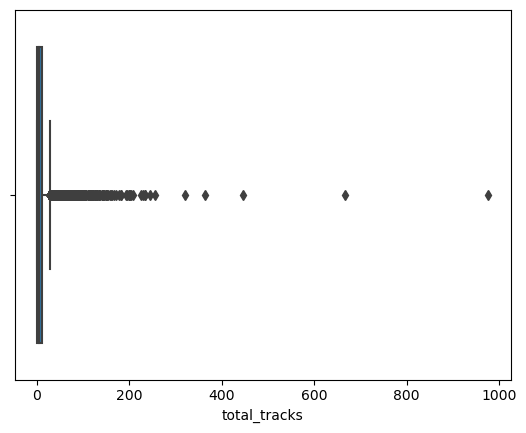

In [13]:
sns.boxplot(data=albums, x='total_tracks')
plt.show()

## EDA - ARTISTS

**Data Dictionary**

The following data dictionary provides an overview of the variables found in the Spotify artist dataset. This dataset contains information about various artists, their popularity, followers, genres, and associated tracks,

* **artist_popularity** : the scale of popularity of the artist - [0 -100] where 100 is the most popular.
* **followers** : total amount of the artist's spotify followers
* **genres** : the name of the gender(s) associated with that artist
* **id** : unique identifier for each artist
* **name** : artist name
* **track_id** : unique identifier for the artist's track
* **track_name_prev** : The name of the previous track in the album or the previous version of the track (depending on the context in your dataset).
* **type** : "artist" - i will drop this column

In [14]:
artists = pd.read_csv('SpotGenTrack/Data Sources/spotify_artists.csv', index_col = 0)

In [15]:
artists.head()

,artist_popularity,followers,genres,id,name,track_id,track_name_prev,type
0,44,23230,"['sertanejo', 'sertanejo pop', 'sertanejo trad...",4mGnpjhqgx4RUdsIJiURdo,Juliano Cezar,0wmDmAILuW9e2aRttkl4aC,track_9,artist
1,22,313,[],1dLnVku4VQUOLswwDFvRc9,The Grenadines,4wqwj0gA8qPZKLl5WVqXml,track_30,artist
2,26,1596,['danish pop rock'],6YVY310fjfUzKi8hiqR7iK,Gangway,1bFqWDbvHmZe2f4Nf9qaD8,track_38,artist
3,31,149,['uk alternative pop'],2VElyouiCfoYPDJluzwJwK,FADES,3MFSUBAidPzRBbIS7BDj1S,track_34,artist
4,21,11,['french baroque'],4agVy03qW8juSysCTUOuDI,Jean-Pierre Guignon,2r3q57FhxdsCyYr0kuDq4b,track_26,artist


In [16]:
#check missing values
artists.isnull().sum()

artist_popularity    0
followers            0
genres               0
id                   0
name                 1
track_id             0
track_name_prev      0
type                 0
dtype: int64

In [17]:
#check duplicates
artists.duplicated().unique()

array([False])

In [18]:
#correlation
artists.corr()

C:\Users\david\AppData\Local\Temp\ipykernel_14776\335023697.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  artists.corr()


,artist_popularity,followers
artist_popularity,1.000000,0.288724
followers,0.288724,1.000000


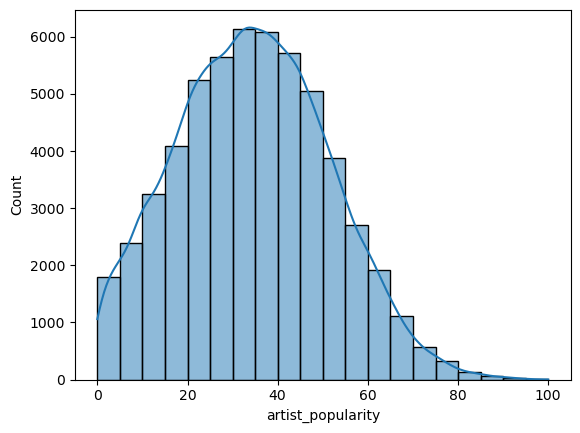

In [19]:
#exploring distribution of each numberical variable

#artist_popularity
sns.histplot(data=artists, x='artist_popularity', bins=20, kde=True)
plt.show()

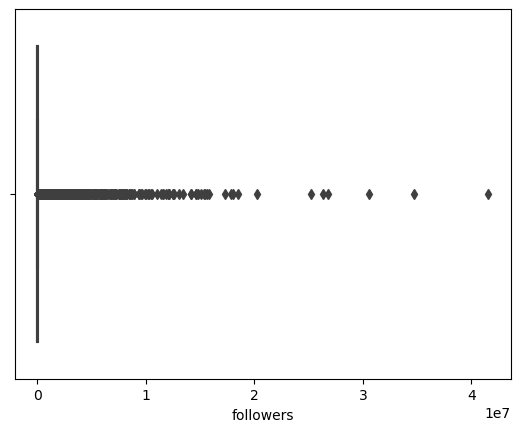

In [20]:
#followers
sns.boxplot(data=artists, x='followers')
plt.show()

## EDA - Tracks

**Data Dictionary**

The following data dictionary provides an overview of the variables found in the Spotify tracks dataset.

* **acousticness**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

* **album_id**: Album unique ID

* **analysis_url**: 

* **artists_id**: Artist unique ID

* **available_markets**:

* **country**:

* **danceability**: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

* **disc_number**:

* **duration_ms**: Duration of song in milliseconds

* **energy**: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

* **href**: 

* **id**: Track unique ID

* **instrumentalness**: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

* **key**: The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

* **liveness**: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

* **loudness**: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

* **lyrics**: Track lyrics

* **mode**: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

* **name**: Track name

* **playlist**: 

* **popularity**: Track Popularity (0-100) where higher is better

* **preview_url**: 

* **speechiness**: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

* **tempo**: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

* **time_signature**:

* **track_href**:

* **track_name_prev**:

* **track_number**:

* **uri**:

* **valence**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

* **type**: Track. Not important

In [26]:
tracks = pd.read_csv('SpotGenTrack/Data Sources/spotify_tracks.csv', index_col = 0)

In [27]:
tracks.head()

,acousticness,album_id,analysis_url,artists_id,available_markets,country,danceability,disc_number,duration_ms,energy,...,preview_url,speechiness,tempo,time_signature,track_href,track_name_prev,track_number,uri,valence,type
0,0.294,0D3QufeCudpQANOR7luqdr,https://api.spotify.com/v1/audio-analysis/5qlj...,['3mxJuHRn2ZWD5OofvJtDZY'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.698,1.0,235584.0,0.606,...,https://p.scdn.co/mp3-preview/1b05a902da3a251d...,0.0262,115.018,4.0,https://api.spotify.com/v1/tracks/5qljLQuKnNJf...,track_14,1.0,spotify:track:5qljLQuKnNJf4F4vfxQB0V,0.6220,track
1,0.863,1bcqsH5UyTBzmh9YizdsBE,https://api.spotify.com/v1/audio-analysis/3VAX...,['4xWMewm6CYMstu0sPgd9jJ'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.719,1.0,656960.0,0.308,...,https://p.scdn.co/mp3-preview/d8140736a6131cb5...,0.9220,115.075,3.0,https://api.spotify.com/v1/tracks/3VAX2MJdmdqA...,track_3,3.0,spotify:track:3VAX2MJdmdqARLSU5hPMpm,0.5890,track
2,0.750,4tKijjmxGClg4JOLAyo2qE,https://api.spotify.com/v1/audio-analysis/1L3Y...,['3hYaK5FF3YAglCj5HZgBnP'],['GB'],BE,0.466,1.0,492840.0,0.931,...,https://p.scdn.co/mp3-preview/c8af28fb15185b18...,0.9440,79.565,4.0,https://api.spotify.com/v1/tracks/1L3YAhsEMrGV...,track_4,4.0,spotify:track:1L3YAhsEMrGVvCgDXj2TYn,0.0850,track
3,0.763,6FeJF5r8roonnKraJxr4oB,https://api.spotify.com/v1/audio-analysis/6aCe...,['2KQsUB9DRBcJk17JWX1eXD'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.719,1.0,316578.0,0.126,...,https://p.scdn.co/mp3-preview/7629b8e9f31f6e9b...,0.9380,112.822,3.0,https://api.spotify.com/v1/tracks/6aCe9zzoZmCo...,track_9,1.0,spotify:track:6aCe9zzoZmCojX7bbgKKtf,0.5330,track
4,0.770,4tKijjmxGClg4JOLAyo2qE,https://api.spotify.com/v1/audio-analysis/1Vo8...,['3hYaK5FF3YAglCj5HZgBnP'],['GB'],BE,0.460,1.0,558880.0,0.942,...,https://p.scdn.co/mp3-preview/32be593c0eb82868...,0.9430,81.260,4.0,https://api.spotify.com/v1/tracks/1Vo802A38tPF...,track_2,2.0,spotify:track:1Vo802A38tPFHmje1h91um,0.0906,track


In [28]:
tracks.isna().sum() # NO NAN values

acousticness         0
album_id             0
analysis_url         0
artists_id           0
available_markets    0
country              0
danceability         0
disc_number          0
duration_ms          0
energy               0
href                 0
id                   0
instrumentalness     0
key                  0
liveness             0
loudness             0
lyrics               0
mode                 0
name                 0
playlist             0
popularity           0
preview_url          0
speechiness          0
tempo                0
time_signature       0
track_href           0
track_name_prev      0
track_number         0
uri                  0
valence              0
type                 0
dtype: int64

In [29]:
tracks.columns

Index(['acousticness', 'album_id', 'analysis_url', 'artists_id',
       'available_markets', 'country', 'danceability', 'disc_number',
       'duration_ms', 'energy', 'href', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'lyrics', 'mode', 'name', 'playlist',
       'popularity', 'preview_url', 'speechiness', 'tempo', 'time_signature',
       'track_href', 'track_name_prev', 'track_number', 'uri', 'valence',
       'type'],
      dtype='object')

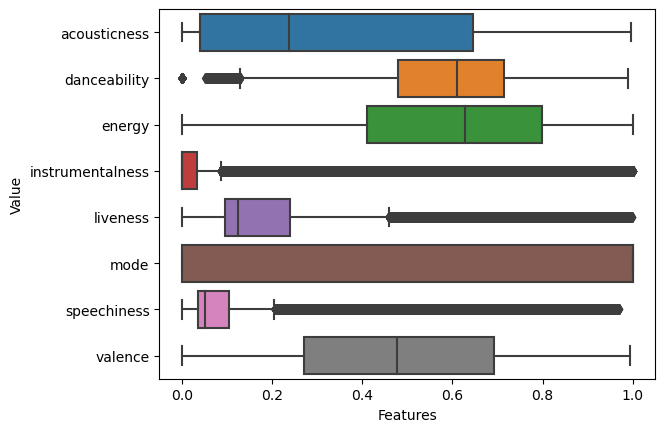

In [30]:
sns.boxplot(data=tracks[['acousticness', 'danceability', 'energy', 'instrumentalness',	'liveness',	'mode', 'speechiness', 'valence']], orient='h' )
plt.xlabel('Features')
plt.ylabel('Value')
plt.show()

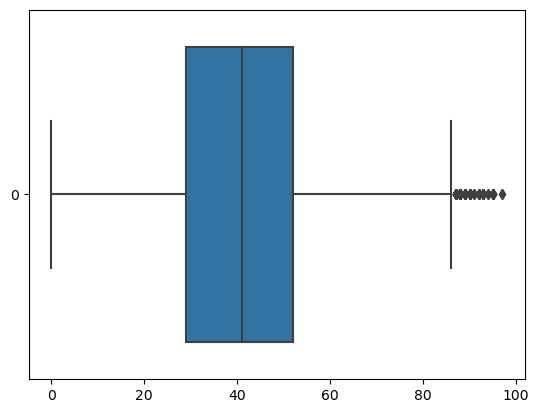

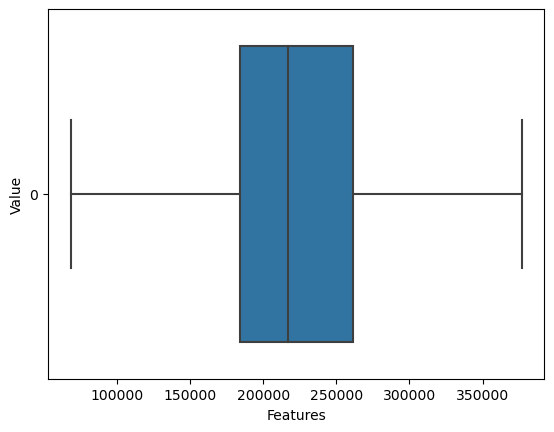

In [31]:
sns.boxplot(data=tracks['popularity'], orient='h' )
plt.show()
sns.boxplot(data=tracks['duration_ms'], orient='h', showfliers=False)
plt.xlabel('Features')
plt.ylabel('Value')
plt.show()

In [32]:
tracks.describe()

,acousticness,danceability,disc_number,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,time_signature,track_number,valence
count,101939.000000,101939.000000,101939.000000,1.019390e+05,101939.000000,101939.000000,101939.000000,101939.000000,101939.000000,101939.000000,101939.000000,101939.000000,101939.000000,101939.000000,101939.000000,101939.000000
mean,0.352124,0.586015,1.032166,2.467708e+05,0.586479,0.148776,5.270858,0.197640,-9.462720,0.618154,39.782311,0.128841,118.358527,3.875651,4.608060,0.482813
std,0.334855,0.177724,0.566789,1.904303e+05,0.260170,0.304024,3.577679,0.175391,6.198508,0.485841,16.790769,0.203324,30.224074,0.517008,7.181805,0.261690
min,0.000000,0.000000,1.000000,1.155000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.040700,0.480000,1.000000,1.840000e+05,0.411000,0.000000,2.000000,0.095600,-11.149000,0.000000,29.000000,0.036400,95.973000,4.000000,1.000000,0.271000
50%,0.238000,0.610000,1.000000,2.168930e+05,0.629000,0.000037,5.000000,0.124000,-7.599000,1.000000,41.000000,0.050600,118.067000,4.000000,2.000000,0.477000
75%,0.645000,0.714000,1.000000,2.610550e+05,0.798000,0.034400,8.000000,0.241000,-5.509000,1.000000,52.000000,0.104000,136.045000,4.000000,6.000000,0.693000
max,0.996000,0.989000,81.000000,5.505831e+06,1.000000,1.000000,11.000000,0.999000,2.719000,1.000000,97.000000,0.969000,244.035000,5.000000,655.000000,0.993000


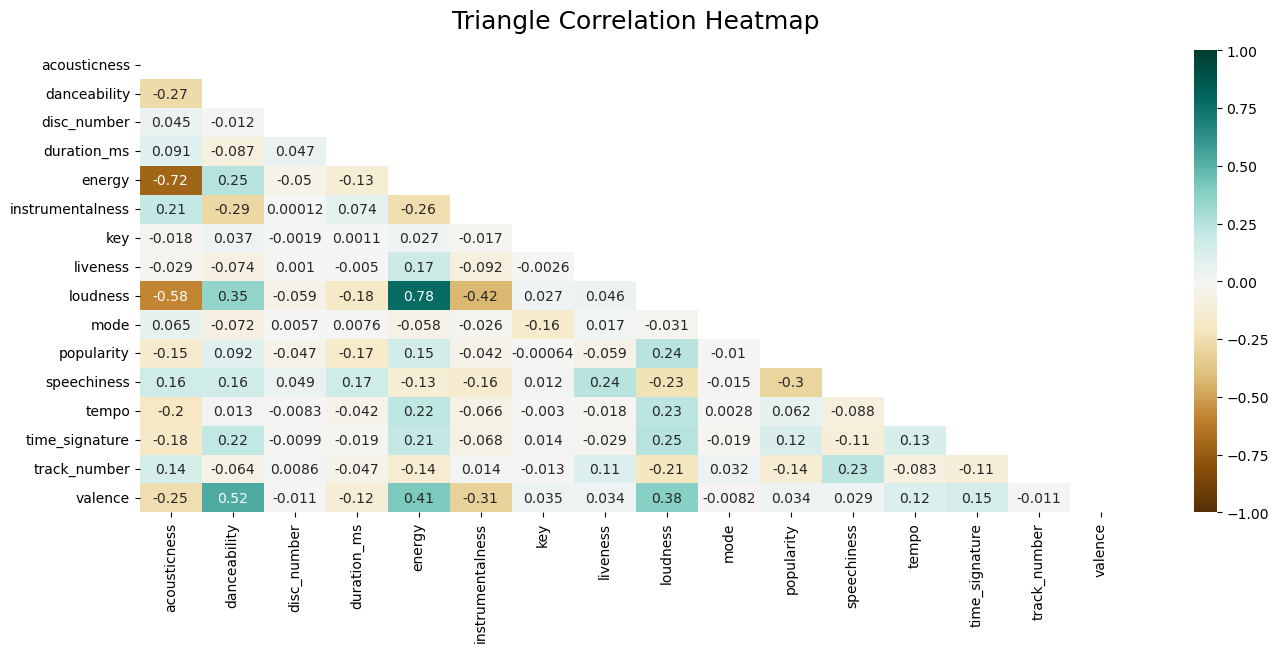

In [33]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(tracks.corr(numeric_only=True)))
heatmap = sns.heatmap(tracks.corr(numeric_only=True), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [34]:
tracks.corr(numeric_only=True).popularity.sort_values(ascending=False)

popularity          1.000000
loudness            0.239679
energy              0.153979
time_signature      0.121505
danceability        0.092382
tempo               0.061869
valence             0.034412
key                -0.000641
mode               -0.010003
instrumentalness   -0.041537
disc_number        -0.047331
liveness           -0.059116
track_number       -0.139460
acousticness       -0.154408
duration_ms        -0.169125
speechiness        -0.304212
Name: popularity, dtype: float64

In [ ]:
sns.pairplot(data=tracks[['popularity', 'loudness', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence', 'duration_ms']])
plt.show()

In [ ]:
sns.scatterplot(x="loudness", y="energy", data=tracks)


In [ ]:
sns.jointplot(x="loudness", y="energy", data=tracks, kind="hex", height=4.5)


In [ ]:
sns.jointplot(x="acousticness", y="energy", data=tracks, kind="hex", height=4.5)


In [ ]:
sns.jointplot(x="loudness", y="acousticness", data=tracks, kind="hex", height=4.5)


In [ ]:
sns.jointplot(x="danceability", y="valence", data=tracks, kind="hex", height=4.5)


In [ ]:
sns.jointplot(x="loudness", y="valence", data=tracks, kind="hex", height=4.5)


In [ ]:
audio_features = pd.read_csv('SpotGenTrack/Features Extracted/low_level_audio_features.csv', index_col = 0)

In [ ]:
audio_features.head()

In [ ]:
audio_features.columns

In [ ]:
audio_features.describe()

In [ ]:
audio_features.corr(numeric_only=True)

In [ ]:
lyrics_features = pd.read_csv('SpotGenTrack/Features Extracted/lyrics_features.csv', index_col = 0)

In [ ]:
lyrics_features.head()

In [ ]:
lyrics_features.columns

In [ ]:
lyrics_features.describe()

In [ ]:
lyrics_features.corr(numeric_only=True)

In [ ]:
df3 = pd.read_csv("Data Sources/spotify_tracks.csv")

In [ ]:
df3.head()

In [ ]:
df3.columns